# K-MEANS
### Are there any groups?
### Different stages of cancer? Different types of breast cancer?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py # Sirve para hacer un dibujo 3D mas adelante
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import io
#from google.colab import files 
#para subir datasets a colab, porque tenemos que subirlos a la nube. Y eso lo hacemos con files.

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Eliminate " Unnamed: 32" & "id"
df= df.drop("Unnamed: 32",axis=1)
df= df.drop("id", axis=1)

In [4]:
#Divide the dataset in target and all the other features

df_nt= df.iloc[:,1:32]
df_t=df.iloc[:,0]


## Scale variables

In [5]:
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler()
df= scaler.fit_transform(df_nt)
scaled_df = pd.DataFrame(df_nt, columns=df_nt.columns)
print(scaled_df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [6]:
X1 = scaled_df.iloc[: , :].values

#Estoy trabajando con todas las columnas

inertia = [] #conjunto de las distancias
for n in range(1 , 15):
    grupos = KMeans(n_clusters = n ,init='k-means++', n_init = 10  ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
    grupos.fit(X1)
    inertia.append(grupos.inertia_)
    
    


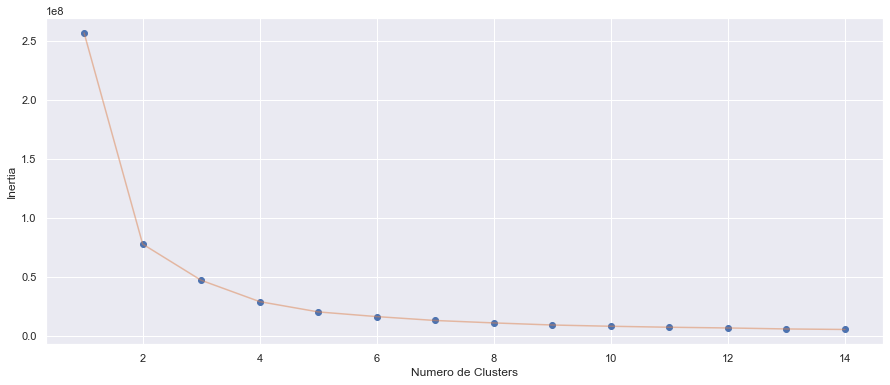

In [13]:
#Graficamos 
#Hay que observar el codo, ya 4-5 grupos seria una cantidad razonable de grupos.

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de Clusters') , plt.ylabel('Inertia')
plt.show()


# K = 4

In [7]:

#Codigo limpio

grupos = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
grupos.fit(X1)
labels1 = grupos.labels_
print(grupos.fit(X1))

#print(labels1)
centroids1 = grupos.cluster_centers_
print(centroids1)

KMeans(algorithm='elkan', n_clusters=4, random_state=111)
[[1.45225414e+01 1.94853591e+01 9.47017680e+01 6.54760773e+02
  9.63986740e-02 1.10806519e-01 9.33174972e-02 5.08652597e-02
  1.79946409e-01 6.19937017e-02 3.51625414e-01 1.07288950e+00
  2.51445249e+00 3.21568508e+01 6.11319890e-03 2.57552044e-02
  3.16646961e-02 1.20207569e-02 1.82920331e-02 3.54741878e-03
  1.66481768e+01 2.63138674e+01 1.10286851e+02 8.56992265e+02
  1.33448895e-01 2.94730387e-01 3.16295414e-01 1.29223978e-01
  2.98213812e-01 8.65719337e-02]
 [2.34015789e+01 2.27621053e+01 1.56147368e+02 1.72942105e+03
  1.04154211e-01 1.71922105e-01 2.39015789e-01 1.34857895e-01
  1.85884211e-01 5.91452632e-02 1.19100000e+00 1.25407895e+00
  8.56357895e+00 1.91449474e+02 7.10673684e-03 3.64242105e-02
  4.79426316e-02 1.59331579e-02 2.00326316e-02 3.80478947e-03
  2.99315789e+01 3.02952632e+01 2.03073684e+02 2.76584211e+03
  1.41510526e-01 3.89415789e-01 5.05994737e-01 2.27526316e-01
  2.89852632e-01 8.18736842e-02]
 [1.1374

In [8]:
scaled_df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Graficaremos 3D

# Añadiendo los centroides
Radius_worst (20)
concave points_worst (27)
texture_worst (posicion 21)

In [9]:
#radius_worst:

valores = []
for lista in centroids1:
    valor_20 = lista[20]
    valor_27 = lista[27]
    valor_21 = lista[21]
    valores.append([valor_20, valor_27, valor_21])

In [30]:
print(valores)

#en la primera lista tenemos lo centroides del cluster 0..

[[16.64817679558011, 0.12922397790055248, 26.313867403314916], [29.931578947368422, 0.2275263157894737, 30.295263157894738], [12.530033582089551, 0.06942250373134326, 23.787201492537314], [22.941584158415843, 0.1870610891089109, 28.682673267326734]]


In [12]:
centroid_c0 = valores[0]
centroid_c1 = valores[1]
centroid_c2 = valores[2]
centroid_c3 = valores[3]


In [21]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df_nt['radius_worst'],
    y= df_nt['concave points_worst'],
    z= df_nt['texture_worst'],
    mode='markers',
     marker=dict(
        color = concatenated_df['cluster'], #CLUSTER ES LA NUEVA COLUMNA CON EL CLUSTER TAG
        size= 5,
        line=dict(
            color= concatenated_df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'BreastCancer clusters ',
    scene = dict(
            xaxis = dict(title  = 'radius_worst'),
            yaxis = dict(title  = 'concave points_worst'),
            zaxis = dict(title  = 'texture_worst')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [22]:
y_kmeans = grupos.fit_predict(X1)
scaled_df['cluster'] = pd.DataFrame(y_kmeans)
scaled_df.head()

#Lo añado al df original

#le agrego la variable target
concatenated_df = pd.concat([scaled_df, df_t], axis=1)

concatenated_df


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,3,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,3,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,3,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,2,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,3,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,3,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,3,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,3,M


<AxesSubplot:xlabel='area_worst', ylabel='concave points_worst'>

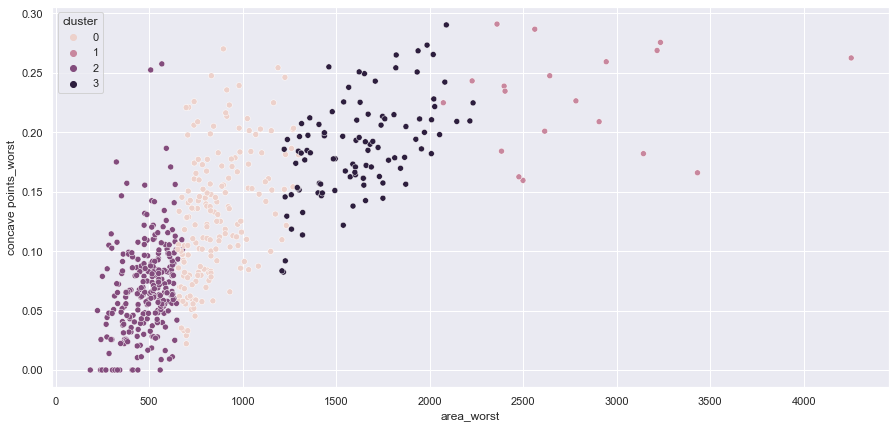

In [10]:
# GRAFICO 2D 
sns.set(rc={"figure.figsize":(15, 7)}) #ancho=15, #alto= 6
sns.scatterplot(data=scaled_df, x="area_worst", y="concave points_worst", hue="cluster")

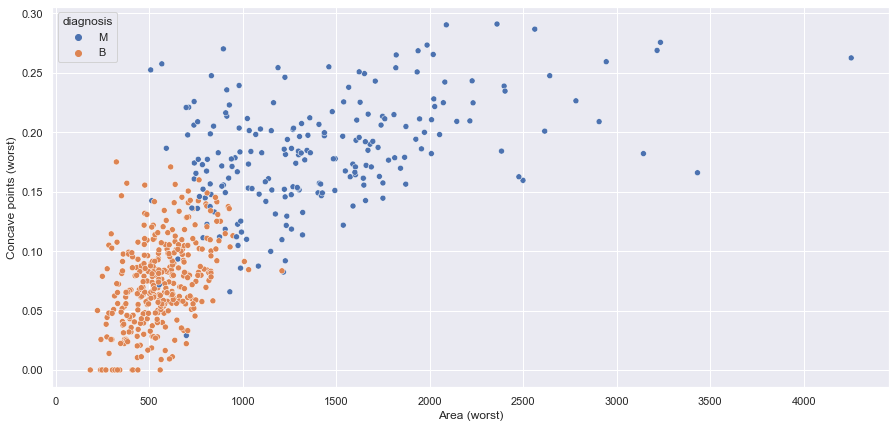

In [16]:
#Aca si le pongo los centroides.

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters).fit(X1)

sns.set(rc={"figure.figsize":(15, 7)})
colors = ['red', 'blue', 'purple','green']
ax = sns.scatterplot(data=concatenated_df, x="area_worst", y="concave points_worst", hue="diagnosis")
#ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],hue=range(num_clusters), palette=colors, s=80, ec='black', legend=False, ax=ax)
ax.set(xlabel = "Area (worst)", ylabel = "Concave points (worst)")
sns.set(rc={"figure.figsize":(15, 7)}) #ancho=15, #alto= 7

#sns.lineplot(data=X1[:, 1])
plt.show()

# Crearemos dataframes de cada cluster.
## Alguno tiene todos benignos, todos malignos?

In [52]:
dataframes = {}

grupos = concatenated_df.groupby('cluster')
for nombres, grupo in grupos:
    dataframes[nombres] = pd.DataFrame(grupo)

    

In [53]:
cluster0 = dataframes[0]
cluster1 = dataframes[1]
cluster2 = dataframes[2]
cluster3 = dataframes[3]

## Cluster 0 count

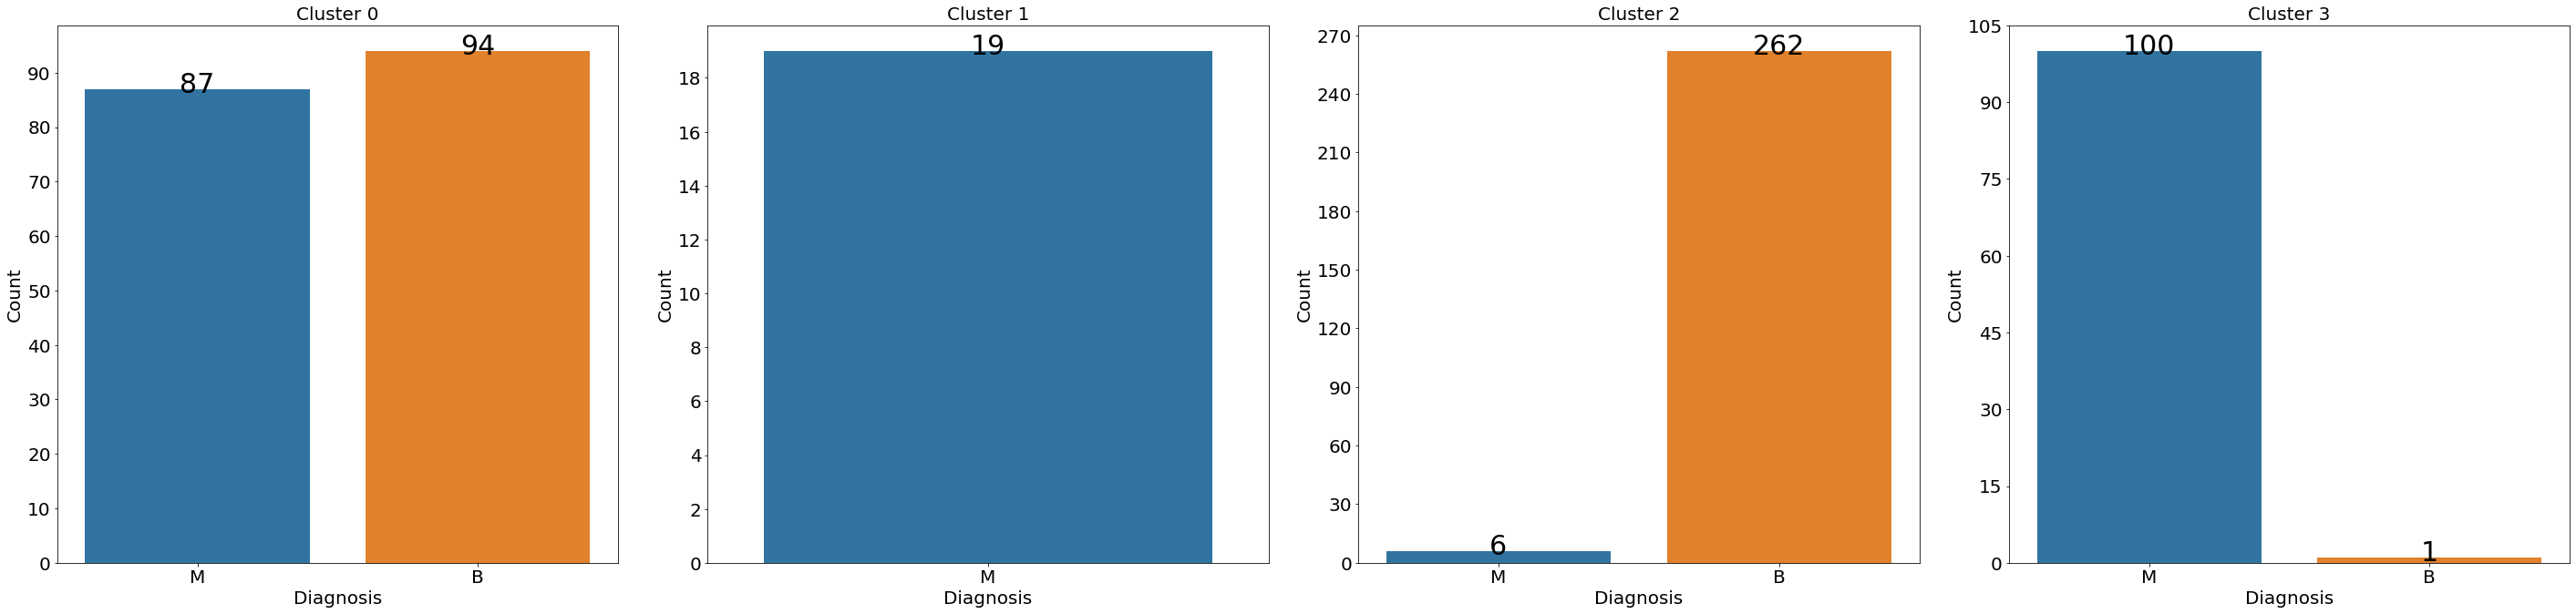

In [79]:
from matplotlib.ticker import MaxNLocator

plt.figure(1, figsize=(40, 10))

n = 0
m = 0 
for x in [cluster0,cluster1,cluster2,cluster3]:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace=3, wspace=3)
    plt.tight_layout(pad=3)
    ax = sns.countplot(x="diagnosis", data=x)
    plt.title('Cluster {}'.format(m), fontsize=20)
    m += 1
    ax.tick_params(labelsize=20)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=30, color='black')
    

    plt.xlabel("Diagnosis", fontsize=20)  # Aumenta el tamaño de la etiqueta del eje x
    plt.ylabel("Count", fontsize=20) 
    
plt.show()

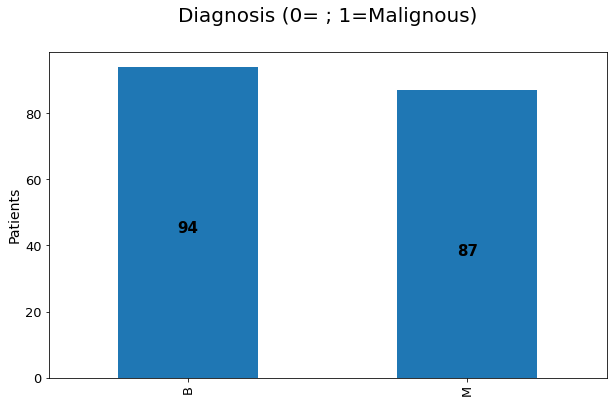

In [54]:
ax = cluster0['diagnosis'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13)
ax.set_title('Diagnosis (0= ; 1=Malignous)', size=20, pad=30)
ax.set_ylabel('Patients', fontsize=14)

for i, value in enumerate( cluster0['diagnosis'].value_counts()):
     ax.text(i - 0, value -50 , str(value), ha='center', fontsize=15, weight='bold')

In [34]:
cluster0

NameError: name 'cluster0' is not defined

#### Explicacion

La línea grupos = df.groupby('Cluster') realiza una operación de agrupación en el DataFrame df utilizando la columna 'Cluster'. El método groupby() de pandas permite agrupar filas en un DataFrame según los valores únicos de una o varias columnas.

En este caso, se está agrupando el DataFrame df por los valores únicos que aparecen en la columna 'Cluster'. El resultado es un objeto DataFrameGroupBy que contiene grupos de filas que comparten el mismo valor en la columna 'Cluster'.

Puedes pensar en grupos como una estructura que contiene varios grupos de datos, donde cada grupo está asociado a un valor único en la columna 'Cluster'. Puedes realizar operaciones adicionales en cada grupo, como aplicar una función de agregación o acceder a los datos de cada grupo por separado.